In [1]:
# Load libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

# Load data

In [3]:
vert_cesm2 = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM2_wap500.nc')
vert_cesm2.load()

cesm2 = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM2_LENS_TAS.nc')
cesm2.load()

<xarray.DataArray 'TREFHT' (version: 10, time: 1980, lat: 88, lon: 179)>
array([[[[249.20671936, 248.95150213, 248.88449682, ..., 249.93269714,
          249.81806997, 249.70186834],
         [250.46161007, 250.201263  , 250.05500497, ..., 251.91732449,
          251.5203548 , 251.20300301],
         [253.45790685, 253.0994033 , 252.68619478, ..., 255.08447715,
          254.74654287, 254.37330494],
         ...,
         [244.52150792, 245.04614187, 245.58627769, ..., 241.70185476,
          242.38145786, 243.18406776],
         [242.68788605, 243.10105472, 243.41689597, ..., 240.94394192,
          241.44196871, 241.87216254],
         [241.98651082, 242.22184469, 242.46315002, ..., 240.88744486,
          241.15546544, 241.48706202]],

        [[237.69156794, 237.39916128, 237.29390106, ..., 238.49573186,
          238.36419245, 238.21687943],
         [239.64262034, 239.24149907, 238.88944075, ..., 241.1342219 ,
          240.76482561, 240.41187414],
         [242.98028712, 242.51352973, 241.95965517, ..., 244.90257297,
          244.48228531, 244.0680053 ],
...
         [259.80389777, 260.44974186, 261.22291734, ..., 257.58050761,
          257.96195357, 258.52510627],
         [259.45296868, 259.98323398, 260.40770552, ..., 257.72228241,
          258.14609951, 258.54001312],
         [260.38866465, 260.5588502 , 260.76231486, ..., 259.73925181,
          259.89282481, 260.09243642]],

        [[247.68641301, 247.44301254, 247.38612747, ..., 248.31856227,
          248.24217351, 248.14280899],
         [248.54129249, 248.30669471, 248.11289427, ..., 249.45034612,
          249.20319917, 249.02442644],
         [250.71946416, 250.44886573, 250.11663878, ..., 252.24950999,
          251.89477895, 251.53308757],
         ...,
         [257.40264503, 257.83228807, 258.31363627, ..., 254.6944858 ,
          255.49829856, 256.30417735],
         [257.93077155, 258.2227356 , 258.46821764, ..., 256.79239858,
          257.15104506, 257.44143609],
         [259.16119059, 259.1927243 , 259.23129628, ..., 258.8697936 ,
          258.95587769, 259.06216766]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: version
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

# Correlations

## Creating the ensemble mean - forced signal

In [4]:
cesm2_forced = cesm2.mean('version')
cesm2_forced

<xarray.DataArray 'TREFHT' (time: 1980, lat: 88, lon: 179)>
array([[[249.1761842 , 248.91919784, 248.85576411, ..., 249.85749287,
         249.76900747, 249.65915405],
        [249.88391333, 249.61089159, 249.38591766, ..., 250.9532697 ,
         250.65959608, 250.42907324],
        [252.09829029, 251.71331659, 251.2764792 , ..., 253.80172303,
         253.41123138, 253.01557509],
        ...,
        [243.69451027, 244.01108178, 244.3489028 , ..., 242.12455126,
         242.53956355, 242.98046221],
        [242.41781882, 242.64374277, 242.83109623, ..., 241.44553656,
         241.72431043, 241.96307396],
        [242.15814128, 242.26702773, 242.38117002, ..., 241.609883  ,
         241.74771642, 241.9152718 ]],

       [[237.19733399, 236.88516351, 236.77366875, ..., 238.04316407,
         237.92240173, 237.77878473],
        [238.82327894, 238.4631878 , 238.15349867, ..., 240.19536221,
         239.83049689, 239.52467407],
        [242.23676674, 241.75619117, 241.22779489, ..., 244.27785939,
         243.80692906, 243.33479553],
...
        [258.82025771, 259.17300633, 259.53587245, ..., 257.19204724,
         257.59077694, 258.04371318],
        [257.72979884, 257.93626712, 258.10994148, ..., 256.93252227,
         257.14394794, 257.34211915],
        [257.42160494, 257.48001727, 257.54384204, ..., 257.16161818,
         257.22669965, 257.30500641]],

       [[248.39684292, 248.16111552, 248.11981822, ..., 248.97917127,
         248.90934418, 248.82920339],
        [249.07420915, 248.84808727, 248.673624  , ..., 249.98257796,
         249.7213334 , 249.52909818],
        [251.35531223, 251.0082578 , 250.60659047, ..., 252.94834509,
         252.59510245, 252.22717955],
        ...,
        [254.64649057, 254.98572158, 255.32949165, ..., 252.82337897,
         253.2993029 , 253.81339873],
        [253.21771159, 253.40936601, 253.55464927, ..., 252.39508682,
         252.64252781, 252.84988098],
        [252.1553958 , 252.20531378, 252.25423452, ..., 251.95441361,
         252.00478147, 252.05520559]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

## Smoothing to 10 year mean

In [5]:
cesm2_smoothed = cesm2.rolling(time=120, center=True).mean('time')
cesm2_smoothed

<xarray.DataArray 'TREFHT' (version: 10, time: 1980, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: version
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [6]:
cesm2_forced_smoothed = cesm2_forced.rolling(time=120, center=True).mean('time')
cesm2_forced_smoothed

<xarray.DataArray 'TREFHT' (time: 1980, lat: 88, lon: 179)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

## Correlate local temperatures

In [8]:
cesm2_local_corr = xr.corr(cesm2_smoothed, cesm2_forced_smoothed, dim='time')
cesm2_local_corr

<xarray.DataArray 'TREFHT' (version: 10, lat: 88, lon: 179)>
array([[[0.90270879, 0.90229193, 0.90173063, ..., 0.9039584 ,
         0.90360101, 0.90335464],
        [0.92238182, 0.92197807, 0.92141633, ..., 0.92271629,
         0.92243004, 0.92246761],
        [0.94149514, 0.94054941, 0.93941952, ..., 0.94326572,
         0.94359275, 0.94329178],
        ...,
        [0.92183645, 0.92236234, 0.92344154, ..., 0.92063913,
         0.92021505, 0.92080355],
        [0.94305142, 0.94377174, 0.94438503, ..., 0.94276281,
         0.94252454, 0.94255288],
        [0.95145534, 0.95151702, 0.95160763, ..., 0.95142339,
         0.95135474, 0.95137024]],

       [[0.87640452, 0.87688822, 0.87755707, ..., 0.87264753,
         0.87344563, 0.87455634],
        [0.84839431, 0.85087892, 0.85340299, ..., 0.84377957,
         0.84423635, 0.84517293],
        [0.80508878, 0.80488893, 0.80576552, ..., 0.81179523,
         0.80985461, 0.80766518],
...
        [0.90814635, 0.90649765, 0.90545134, ..., 0.91672263,
         0.91448836, 0.91216911],
        [0.9317461 , 0.9311618 , 0.93064231, ..., 0.93576471,
         0.93426736, 0.93312189],
        [0.95065897, 0.95037865, 0.95010597, ..., 0.95114534,
         0.95095442, 0.95101483]],

       [[0.82482968, 0.8244934 , 0.8235276 , ..., 0.82729419,
         0.82661249, 0.8259127 ],
        [0.79846491, 0.79763811, 0.79737316, ..., 0.80550026,
         0.80314442, 0.80114663],
        [0.77129419, 0.77023562, 0.76986124, ..., 0.78337263,
         0.78065513, 0.77813281],
        ...,
        [0.9329126 , 0.93038641, 0.92787034, ..., 0.94469999,
         0.9420211 , 0.9389348 ],
        [0.9404976 , 0.93885052, 0.93748176, ..., 0.94661647,
         0.94491434, 0.94334512],
        [0.94288706, 0.94222507, 0.94147437, ..., 0.94577842,
         0.94502151, 0.9441531 ]]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: version

In [9]:
cesm2_local_corr_mean = cesm2_local_corr.mean('version')

Text(0.5, 1.0, 'CESM2 TAS Correlation - Local temperature')

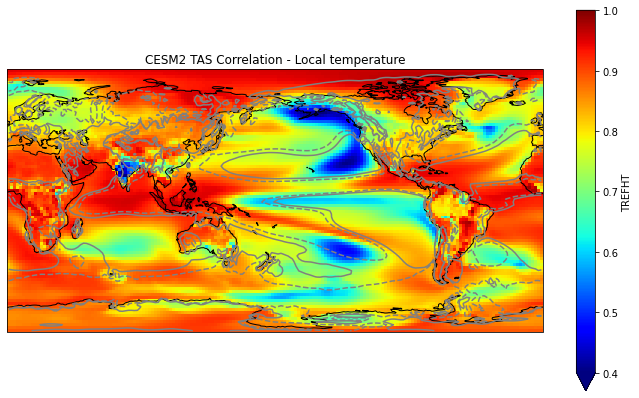

In [15]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cesm2_local_corr_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
ax.coastlines(color='black', linewidth=1)
vert_cesm2.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('CESM2 TAS Correlation - Local temperature')

## Correlation to global temperature

In [16]:
cesm2_global_corr = xr.corr(cesm2_smoothed, cesm2_forced_smoothed.mean('lat').mean('lon'), dim='time')
cesm2_global_corr

<xarray.DataArray 'TREFHT' (version: 10, lat: 88, lon: 179)>
array([[[0.91709928, 0.91688188, 0.91656247, ..., 0.91770893,
         0.91748249, 0.91729846],
        [0.93083359, 0.93078833, 0.93073727, ..., 0.92994567,
         0.92979106, 0.93001102],
        [0.9389603 , 0.93922393, 0.93930753, ..., 0.93652926,
         0.93789636, 0.93861287],
        ...,
        [0.84756394, 0.84687509, 0.84680262, ..., 0.85265407,
         0.85061862, 0.84936753],
        [0.87715103, 0.87735889, 0.87765792, ..., 0.87890382,
         0.87822784, 0.87780342],
        [0.89100536, 0.89090163, 0.89084984, ..., 0.89182588,
         0.89158652, 0.89137268]],

       [[0.85183673, 0.85172845, 0.85184039, ..., 0.84975606,
         0.85028982, 0.85100541],
        [0.83148957, 0.8323642 , 0.83350939, ..., 0.83218236,
         0.83151186, 0.83122654],
        [0.79399425, 0.79209668, 0.79121229, ..., 0.80917906,
         0.80505455, 0.80072665],
...
        [0.91122173, 0.90869181, 0.90658281, ..., 0.92456984,
         0.92118393, 0.91742138],
        [0.92895777, 0.92763397, 0.92645451, ..., 0.93541221,
         0.93344214, 0.93162743],
        [0.94264071, 0.94202856, 0.94136427, ..., 0.94459592,
         0.94411256, 0.94369717]],

       [[0.79523237, 0.79466838, 0.79341603, ..., 0.79802931,
         0.79732982, 0.79656323],
        [0.75661295, 0.7561371 , 0.75588774, ..., 0.76389987,
         0.76146736, 0.7594023 ],
        [0.71057565, 0.70922351, 0.70890374, ..., 0.72407151,
         0.72107773, 0.71819143],
        ...,
        [0.89634658, 0.89169318, 0.88647294, ..., 0.91351517,
         0.91043312, 0.90610874],
        [0.90012902, 0.89778698, 0.89584935, ..., 0.90916219,
         0.90665276, 0.90426183],
        [0.9012027 , 0.90045645, 0.89965218, ..., 0.90488247,
         0.90390339, 0.90277602]]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: version

In [17]:
cesm2_global_corr_mean = cesm2_global_corr.mean('version')
cesm2_global_corr_mean

<xarray.DataArray 'TREFHT' (lat: 88, lon: 179)>
array([[0.86680443, 0.86682699, 0.86678724, ..., 0.86633472, 0.86648682,
        0.86664744],
       [0.8498483 , 0.85050804, 0.85118893, ..., 0.84864901, 0.84870927,
        0.84906845],
       [0.8273318 , 0.8280343 , 0.82897168, ..., 0.826179  , 0.82651657,
        0.82684665],
       ...,
       [0.89281572, 0.88926898, 0.88583368, ..., 0.90934192, 0.90549537,
        0.90110098],
       [0.91208074, 0.91037802, 0.90903622, ..., 0.9189332 , 0.91706812,
        0.9153362 ],
       [0.92116035, 0.92062484, 0.92004536, ..., 0.92361423, 0.92298728,
        0.92228051]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'CESM2 TAS Correlation - Global temperature')

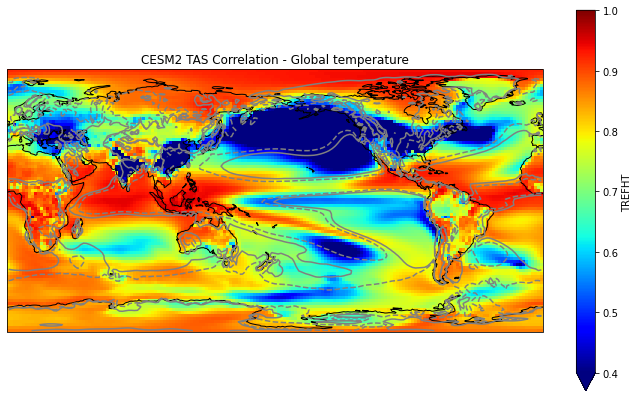

In [18]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cesm2_global_corr_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
ax.coastlines(color='black', linewidth=1)
vert_cesm2.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('CESM2 TAS Correlation - Global temperature')